# Exercícios do CMS Open Data

Este jupyter notebook apresenta as soluções dos exercícios do CMS Open Data

## Inicializações necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Jupyter Notebook uses "magic functions". With this function it is possible to plot
# the histogram straight to notebook.
%matplotlib inline

pd.set_option('display.max_columns', None)

dataset = pd.read_csv('Data/DoubleMuRun2011A.csv')
print("The file has %d rows."% len(dataset))

The file has 475465 rows.


## Influência da pseudorapidez na resolução da energia

Vamos comparar distribuições de massa invariante para valores grandes e pequenos de $\eta$. Abaixo, o código utilizado na aula é copiado para a presente análise com algumas adaptações. Vamos utilizá-lo para responder as perguntas, modificando as variáveis cond1 e cond2.




Quantidade total de eventos = 475465
Quantidade de eventos dentro do corte de seleção de altos valores de eta = 5661
Quantidade de eventos dentro do corte de seleção de baixos valores de eta  = 5686


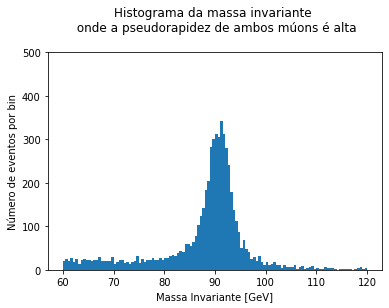

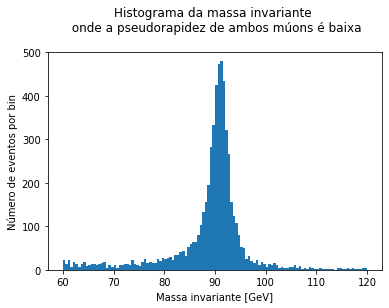

A média e o desvio padrão dos eventos com altos valores de eta é de:

Média:  87.81903290937997
Desvio Padrão:  9.139942600439875 


A média e o desvio padrão dos eventos com baixos valores de eta é de:

Média:  88.960976099191
Média:  7.690423839352535


In [2]:
# Abaixo escolhemos os valores de corte em eta
# Vamos comparar eventos onde os 2 múons possuem valor de eta acima de cond1 
# com eventos onde os 2 múons possuem valor de eta menor que cond2
# Devemos tomar cuidado e escolher valores que resultem no mesmo número de eventos.
cond1 = 1.17 # maior que
cond2 = 0.75 # menor que

# Valores originais (da aula): maior que 1.52 e menor que 0.45
# Valores diferentes escolhidos: maior que 1.17 e menor 0.75

# Aqui criaremos 2 dataframes. 
# Vamos selecionar "large_etas" quando a pseudorapidez for maior que cond1
# e "small_etas" quando a pseudorapidez for menor que cond2
# Além disso, já vamos limitar essa seleção para o intervalo de massa invariante do Z (60-120 GeV).
large_etas = dataset[(np.absolute(dataset.eta1) > cond1) & (np.absolute(dataset.eta2) > cond1) & (dataset.M > 60) & (dataset.M < 120)]
small_etas = dataset[(np.absolute(dataset.eta1) < cond2) & (np.absolute(dataset.eta2) < cond2) & (dataset.M > 60) & (dataset.M < 120)]

# Escrevendo a quantidade de eventos que passam em cada corte de seleção:
print('\n' * 2)

print('Quantidade total de eventos = %d' % len(dataset))
print('Quantidade de eventos dentro do corte de seleção de altos valores de eta = %d' %len(large_etas))
print('Quantidade de eventos dentro do corte de seleção de baixos valores de eta  = %d' %len(small_etas))

# Salvando as massas invariantes do "large_etas" numa variável "inv_mass1"
inv_mass1 = large_etas['M']
# Criar um histograma com a variável "inv_mass1"
plt.hist(inv_mass1, bins=120, range=(60,120))

# Setando o eixo y
axes = plt.gca()
axes.set_ylim([0,500])

# Nomeando os eixos e título do histograma
plt.xlabel('Massa Invariante [GeV]')
plt.ylabel('Número de eventos por bin')
plt.title('Histograma da massa invariante \n onde a pseudorapidez de ambos múons é alta\n')
plt.show()

# Salvando as massas invariantes do "small_etas" numa variável "inv_mass2"
inv_mass2 = small_etas['M']

# Criar um histograma com a variável "inv_mass1"
plt.hist(inv_mass2, bins=120, range=(60,120))

# Setando o eixo y
axes = plt.gca()
axes.set_ylim([0,500])

# Nomeando os eixos e título do histograma
plt.xlabel('Massa invariante [GeV]')
plt.ylabel('Número de eventos por bin')
plt.title('Histograma da massa invariante \n onde a pseudorapidez de ambos múons é baixa\n')
plt.show()

# Calculando a média e o desvio padrão dos "large_etas"
print('A média e o desvio padrão dos eventos com altos valores de eta é de:\n')
print('Média: ', np.mean(inv_mass1))
print('Desvio Padrão: ', np.sqrt(np.var(inv_mass1)),'\n' *2)

# Calculando a média e o desvio padrão dos "small_etas"
print('A média e o desvio padrão dos eventos com baixos valores de eta é de:\n')
print('Média: ', np.mean(inv_mass2))
print('Média: ', np.sqrt(np.var(inv_mass2)))

__Question 1)__ In which way you can see the effect of the pseudorapidity to the measurement resolution of the CMS detector?

É possível observar, a partir das escolhas das condições dadas na aula (cond1=1.52 e cond2=0.45) que o desvio padrão na massa invariante para eventos onde ambos os múons possuem valores baixos de $\eta$ é menor do que aqueles onde ambos os múons possuem altos valores de $\eta$. Substituindo estes valores no código acima, obtemos valores próximos no número de eventos para os 2 casos (2037 eventos de alto $\eta$ e 2017 eventos de baixo $\eta$), enquanto que o desvio padrão dos eventos com múons de alto $\eta$ (\~8,9 GeV) é maior que aqueles de baixo $\eta$ (\~7,6 GeV). Como os número de eventos é semelhante, esta diferença no desvio padrão se dá apenas por conta da diferença na resolução (pior resolução para alto $\eta$). 

__Question 2)__ Do your results show the same than the theory predicts?

Como pode ser visto na Figura 9(a) do paper https://arxiv.org/pdf/1206.4071.pdf (Performance of CMS muon reconstruction in pp collision events at $\sqrt{s}=7$ TeV), é esperado que os múons detectados na região mais frontal do detector (maiores valores de $\eta$) possuam pior resolução do que os múons mais centrais, reconstruídos no barril (menores valores de $\eta$). Isto se dá por conta da diferença na estrutura do detector nessas diferentes regiões. Enquanto que a parte mais central do detector é mais homogênea e mais "equipada" para uma melhor reconstrução do múon, a parte mais externa começa a conter irregularidades, como a sobreposição da parte "barrel" com a "extended" além de maior quantidade de "zonas mortas" que prejudicam a resolução na medida da energia das partículas que passam por ali.

After answering to the questions you can try to change the conditions for the large and small pseudorapidities in the first code cell. The conditions are named _cond1_ and _cond2_. Make sure you choose conditions in a way that there will be nearly same amount of events in both of the groups.

__Question 3)__ After the changes run the code again. How do the changes affect to the number of the events? And how to the histograms?

Vamos redefinir os cortes em $\eta$. Agora, vamos selecionar eventos onde ambos os múons possuem $|\eta|>1.17$ (cond1=1.17, large_etas) ou ambos os múons possuem  $|\eta|<0.75$  (cond2=0.75, small_etas).

Obtemos os seguintes resultados:

large_etas: 

    Número de eventos: 5661

    Média: 87.82
    
    Desvio Padrão: 9.14
    
small_etas:
    
    Número de eventos: 5686
    
    Média: 88.96
    
    Desvio Padrão: 7.69
    
Portanto, apesar de agora estarmos selecionando mais eventos em ambos os casos (\~5600 em cada) devido a uma maior janela em $|\eta|$ (de 0 a 0,75 para small_etas e de 1,17 em diante para large_etas), o desvio padrão da massa invariante no caso de múons reconstruídos para altos valores de $\eta$ (9,14 GeV) é maior que no caso de baixos valores de $\eta$ (7,69 GeV), confirmando o que mostramos anteriormente.

## Distribuição de Breit-Wigner

__Question 4)__ Write a function that represents Breit-Wigner distribution to the values of the histogram. 

To get information about mass and lifetime of the detected resonance, a function that describes the distribution of the invariant masses must be fitted to the values of the histogram. In our case the values follow a Breit-Wigner distribution:

$$
N(E) = \frac{K}{(E-M)^2 + \frac{\Gamma^2}{4}},
$$

where $E$ is the energy, $M$ the maximum of the distribution (equals to the mass of the particle that is detected in the resonance), $\Gamma$ the full width at half maximum (FWHM) or the decay width of the distribution and $K$ a constant.

The Breit-Wigner distribution can also be expressed in the following form:

$$
\frac{ \frac{2\sqrt{2}M\Gamma\sqrt{M^2(M^2+\Gamma^2)} }{\pi\sqrt{M^2+\sqrt{M^2(M^2+\Gamma^2)}}} }{(E^2-M^2)^2 + M^2\Gamma^2},
$$

where the constant $K$ is written open.

The decay width $\Gamma$ and the lifetime $\tau$ of the particle detected in the resonance are related in the following way:

$$
\Gamma \equiv \frac{\hbar}{\tau},
$$

where $\hbar$ is the reduced Planck's constant.

Vamos importar o ROOT para utilizar suas ferramentas. Declaramos o histograma InvMassHist, que conterá os valores de massa invariante do par de múons no intervalo de 60 a 120 GeV. Com base na fórmula acima e na documentação https://twiki.cern.ch/twiki/bin/view/CMSPublic/WorkBookHowToFit#Fitting_a_Breit_Wigner, definimos a função breit_wigner. 

In [3]:
import ROOT # importando o ROOT

# Declarando o histograma da massa invariante
InvMassHist = ROOT.TH1D("InvMass","Massa invariante do par de muons", 100, 60, 120)

# Selecionando, do dataset original, apenas os dados com massa invariante entre 60 e 120 GeV
inv_mass = dataset[(dataset.M > 60) & (dataset.M < 120)]

# Selecionando apenas a informação da massa invariante e transformando-a num array numpy
inv_mass = inv_mass['M']
inv_mass.to_numpy()

# Definindo a função breit_wigner, com base na documentação exposta no texto.
def breit_wigner(x,par):
    arg1 = 14.0/22.0 # ~ 2 sobre pi
    arg2 = par[1]*par[1]*par[2]*par[2] #Gamma=par[1]; Gamma^2=M^2(M^2+Lambda^2)  M=par[2]
    arg3 = ((x[0]*x[0]) - (par[2]*par[2]))*((x[0]*x[0]) - (par[2]*par[2])) #x=E
    arg4 = x[0]*x[0]*x[0]*x[0]*((par[1]*par[1])/(par[2]*par[2]))
    return par[0]*arg1*arg2/(arg3 + arg4)

Welcome to JupyROOT 6.22/03


__Question 5)__ Calculate the lifetime $\tau$ of the Z boson with the uncertainty by using the fit. Compare the calculated value to the known lifetime of the Z. What do you notice? What could possibly explain your observations?

Para isso, vamos ajustar a função de Breit-Wigner à distribuição de massa invariante utilizando o ROOT.

In [4]:
# Preenchendo o histograma com os valores de massa invariante do data set
for mass in inv_mass:
    InvMassHist.Fill(mass)

# Declarando o histograma e setando os valores iniciais dos parâmetros
func = ROOT.TF1("breit_wigner", breit_wigner, 60, 120, 3);
func.SetParName(0,"const")
func.SetParameter(0,1.0)
func.SetParName(1,"sigma")
func.SetParameter(1,95.0)   
func.SetParName(2,"mean")
func.SetParameter(2,5.0)    

# Criando o canvas, desenhando o histograma e fazendo o Fit
canvas = ROOT.TCanvas()
InvMassHist.Draw()
InvMassHist.Fit("breit_wigner","S")

 FCN=2292.35 FROM MIGRAD    STATUS=CONVERGED     425 CALLS         426 TOTAL
                     EDM=1.23246e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.7 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  const        4.84116e+03   4.60244e+01   1.68508e-01   3.72088e-06
   2  sigma        4.31519e+00   3.50337e-02  -1.16005e-04  -1.34522e-03
   3  mean         9.08193e+01   1.63858e-02   9.47035e-06   6.35066e-04


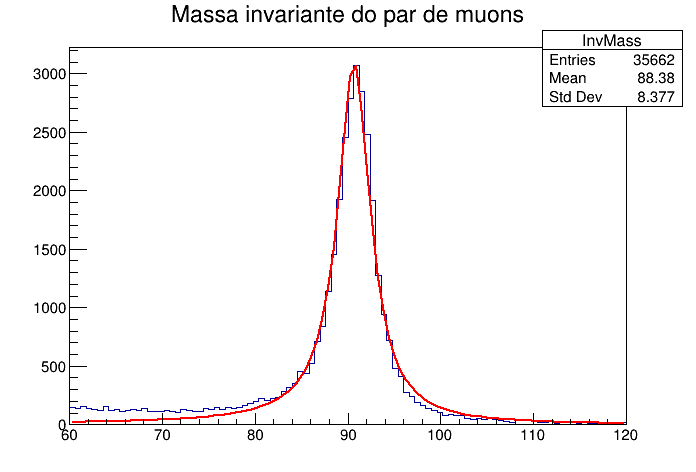

In [5]:
# Desenhando o canvas (hist+fit)
canvas.Draw()

Agora, vamos determinar a largura da distribuição. Para tal, precisamos determinar o valor máximo da função ($p_{max}$) e descobrir qual o valor em x que corresponde à metade do valor máximo ($p_{max}/2$). A largura da distribuição será o dobro da distância entre esses valores, em x, como é possível ver na imagem abaixo.

<img src="Images/1200px-Breit-Wigner.svg.png" alt="Distribuição de Breit-Wigner" style="height: 400px">

In [6]:
xmax = func.Mean(60,120)
ymax = func(xmax)
halfxmax = func.GetX(ymax/2,60,120)
print('xmax = ', xmax , ' ymax = ', ymax , '\nhalfymax = ', ymax/2 , ' halfxmax = ',halfxmax)
width = 2*(xmax-halfxmax)
print('A largura da distribuição do Z é = ', width)

xmax =  90.2732230812116  ymax =  2962.726199455408 
halfymax =  1481.363099727704  halfxmax =  88.44423340813353
A largura da distribuição do Z é =  3.6579793461561394


A vida-média, portanto, será $\tau=\dfrac{\hbar}{\Gamma}$:

In [7]:
hbar = 6.582119E-25 # h cortado de Planck, em GeV.s
lifetime = hbar/width
print('A vida média do bóson Z, em segundos, é de: ', lifetime,'s')

A vida média do bóson Z, em segundos, é de:  1.7993865949288618e-25 s


Este valor é da mesma ordem de grandeza da vida média estimada para o Bóson $Z^0$, o que é uma boa aproximação para esta análise. Talvez o valor se aproxime mais do valor padrão $\tau=3\times10^{-25}$s se impusermos cortes nos valores de $\eta$ dos múons utilizados na reconstrução, utilizando apenas múons reconstruídos na região mais central do detector, onde a resolução é melhor.